In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('train_ctrUa4K.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

#### Preprocessing


In [5]:
#finding out and filling missing values

In [6]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
for i in ['Gender','Married','Dependents','Self_Employed',]:
    data[i] = data[i].fillna(data[i].mode()[0])

In [9]:
for i in ['LoanAmount','Loan_Amount_Term','Credit_History']:
    data[i] = data[i].fillna(data[i].median())

In [10]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
data.drop(['Loan_ID',], axis=1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [12]:
#Label Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
data = data.apply(LabelEncoder().fit_transform)

In [15]:
#Target split

In [16]:
y = data['Loan_Status']
X = data.drop('Loan_Status', axis=1)

In [17]:
#Standard scaling

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
stdsclr = StandardScaler()
X = stdsclr.fit_transform(X)

In [20]:
#Train-Test split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

#### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log_reg = LogisticRegression()

model1 = log_reg.fit(X_train, y_train)

y_pred = model1.predict(X_test)

#### KNN

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [26]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    model2 = knn.fit(X_train, y_train)
    y_pred_knn = model2.predict(X_test)
    acc = accuracy_score(y_test, y_pred_knn)
    metric_k.append(acc)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

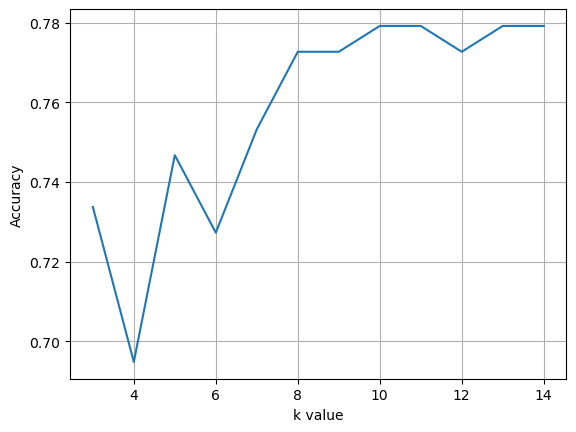

In [27]:
plt.plot(neighbors, metric_k)
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.grid()

In [28]:
knn = KNeighborsClassifier(n_neighbors=14)
model2 = knn.fit(X_train, y_train)
y_pred_knn = model2.predict(X_test)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


#### SVM

In [29]:
from sklearn.svm import SVC

In [30]:
# rbf kernel

In [31]:
svm_rbf = SVC(kernel='rbf')

svm_model1 = svm_rbf.fit(X_train,y_train)

y_pred_rbf = svm_rbf.predict(X_test)

In [32]:
#linear kernel

In [33]:
svm_lnr = SVC(kernel='linear')

svm_model2 = svm_lnr.fit(X_train,y_train)

y_pred_lnr = svm_lnr.predict(X_test)

In [34]:
#polynomial kernel

In [35]:
svm_poly = SVC(kernel='poly')

svm_model3 = svm_poly.fit(X_train,y_train)

y_pred_poly = svm_poly.predict(X_test)

#### Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dt_clf = DecisionTreeClassifier()

dt_clf.fit(X_train,y_train)

y_pred_dt = dt_clf.predict(X_test)

#### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf_clf = RandomForestClassifier()

rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

#### Model Comparison

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [41]:
#confusion matrix
print ('Logistic Regression:\n',confusion_matrix(y_test, y_pred))
print ('KNN:\n',confusion_matrix(y_test, y_pred_knn))
print ('SVM_rbf:\n',confusion_matrix(y_test, y_pred_rbf))
print ('SVM_linear:\n',confusion_matrix(y_test, y_pred_lnr))
print ('SVM_polynomial:\n',confusion_matrix(y_test, y_pred_poly))
print ('Decision Tree:\n',confusion_matrix(y_test, y_pred_dt))
print ('Random Forest:\n',confusion_matrix(y_test, y_pred_rf))

Logistic Regression:
 [[21 33]
 [ 2 98]]
KNN:
 [[21 33]
 [ 1 99]]
SVM_rbf:
 [[21 33]
 [ 2 98]]
SVM_linear:
 [[21 33]
 [ 2 98]]
SVM_polynomial:
 [[21 33]
 [ 4 96]]
Decision Tree:
 [[26 28]
 [22 78]]
Random Forest:
 [[22 32]
 [ 4 96]]


In [42]:
#Accuracy Score
print('Logistic Regression:',accuracy_score(y_test,y_pred))
print('KNN:',accuracy_score(y_test,y_pred_knn))
print('SVM_rbf:',accuracy_score(y_test,y_pred_rbf))
print('SVM_linear:',accuracy_score(y_test,y_pred_lnr))
print('SVM_polynomial:',accuracy_score(y_test,y_pred_poly))
print('Decision Tree:',accuracy_score(y_test,y_pred_dt))
print('Random Forest:',accuracy_score(y_test,y_pred_rf))

Logistic Regression: 0.7727272727272727
KNN: 0.7792207792207793
SVM_rbf: 0.7727272727272727
SVM_linear: 0.7727272727272727
SVM_polynomial: 0.7597402597402597
Decision Tree: 0.6753246753246753
Random Forest: 0.7662337662337663


In [43]:
#### KNN model seems to be doing slightly better in this dataset

#### Prediction

In [44]:
test_data =pd.read_csv('test_lAUu6dG.csv')

In [45]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [46]:
A = test_data['Loan_ID']

In [47]:
test_data.drop(['Loan_ID'], axis=1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


#### Preprocessing

In [48]:
#finding out and filling missing values

In [49]:
test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [50]:
for i in ['Gender','Dependents','Self_Employed','Credit_History']:
    test_data[i] = test_data[i].fillna(test_data[i].mode()[0])

In [51]:
for i in ['LoanAmount','Loan_Amount_Term',]:
     test_data[i] = data[i].fillna(data[i].median())

In [52]:
test_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [53]:
#Label Encoding

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
le = LabelEncoder()
test_data = test_data.apply(LabelEncoder().fit_transform)

In [56]:
# predicting using KNN model

In [57]:
prediction = model2.predict(test_data.values)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [58]:
Predicted_data = pd.DataFrame({'Loan_Status': prediction}, index = A)

In [59]:
Predicted_data.Loan_Status.replace((1, 0), ('Y', 'N'), inplace=True)

In [60]:
Predicted_data.to_csv('Submission.csv')